In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, r'C:\code\astrocam')
import pandas as pd
from pathlib import Path
from fwhm.star_finder import StarFinder
from fwhm.star_matcher import StarMatcher
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
pi_data_file = r"D:\Astro\Objects\C30-NGC7331\fwhm.csv"
df = pd.read_csv(pi_data_file)

In [3]:
fit_list = {x.name:str(x) for x in Path(r"D:\Astro").glob("**/*.fit")}
print(f"Found {len(fit_list)}")

Found 2789


In [4]:
df['fit_file'] = df.File.apply(lambda x: fit_list[re.findall(r'(Light_.*?C).*',x)[0]+".fit"])

In [5]:
df

,Index,Approved,Locked,File,Weight,PSF Signal Weight,PSF Power Weight,SNR Weight,FWHM,Eccentricity,...,Median,Median Mean Deviation,Noise,Noise Ratio,Stars,Star Residual,FWHM Mean Deviation,Eccentricity Mean Deviation,Star Residual Mean Deviation,fit_file
0,14,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00948_...,0.0,776.0,2810000.0,1.80,3.0627,0.4692,...,16.1,2.88,0.429,0.715,458,0.0193,1.1625,0.1532,0.0104,D:\Astro\20220922\C30\Light\Light_00948_180.0s...
1,27,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00961_...,0.0,726.0,2490000.0,1.78,3.1120,0.4887,...,16.6,2.96,0.435,0.720,428,0.0198,1.0250,0.1450,0.0109,D:\Astro\20220922\C30\Light\Light_00961_180.0s...
2,21,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00955_...,0.0,741.0,2610000.0,1.80,3.1677,0.4720,...,16.3,2.91,0.431,0.718,453,0.0208,1.0185,0.1411,0.0103,D:\Astro\20220922\C30\Light\Light_00955_180.0s...
3,18,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00952_...,0.0,759.0,2700000.0,1.81,3.1840,0.4619,...,16.2,2.90,0.430,0.717,447,0.0211,1.0659,0.1480,0.0103,D:\Astro\20220922\C30\Light\Light_00952_180.0s...
4,19,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00953_...,0.0,722.0,2460000.0,1.85,3.1876,0.5180,...,16.3,2.90,0.431,0.718,383,0.0226,1.0306,0.1198,0.0103,D:\Astro\20220922\C30\Light\Light_00953_180.0s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,54,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01310_...,0.0,680.0,2240000.0,1.88,3.9763,0.4168,...,17.1,3.08,0.437,0.726,361,0.0228,1.0214,0.1422,0.0112,D:\Astro\20220927\C30\Light\Light_01310_180.0s...
70,57,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01317_...,0.0,657.0,2070000.0,1.88,3.9848,0.4075,...,17.5,3.16,0.443,0.731,351,0.0258,0.9513,0.1372,0.0122,D:\Astro\20220927\C30\Light\Light_01317_180.0s...
71,52,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01308_...,0.0,689.0,2300000.0,1.89,3.9939,0.4116,...,17.0,3.06,0.435,0.727,366,0.0225,1.0908,0.1505,0.0109,D:\Astro\20220927\C30\Light\Light_01308_180.0s...
72,56,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01312_...,0.0,681.0,2230000.0,1.88,4.0048,0.4207,...,17.2,3.11,0.439,0.728,361,0.0249,0.9815,0.1423,0.0112,D:\Astro\20220927\C30\Light\Light_01312_180.0s...


In [6]:
print(f"Numer of images: {len(df)}")

Numer of images: 74


In [7]:
starfinder = StarFinder()
starmatcher = StarMatcher()
starData = starfinder.getStarData(df.fit_file[0], topk=40)
star_img = starData["star_mask"]
df_ref = starData["stars"]

Calculating FWHM:  78%|███████▊  | 321/410 [00:00<00:00, 330.84it/s]c:\Users\anand\anaconda3\envs\astro\lib\site-packages\scipy\optimize\_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)
Calculating FWHM: 100%|██████████| 410/410 [00:01<00:00, 299.96it/s]


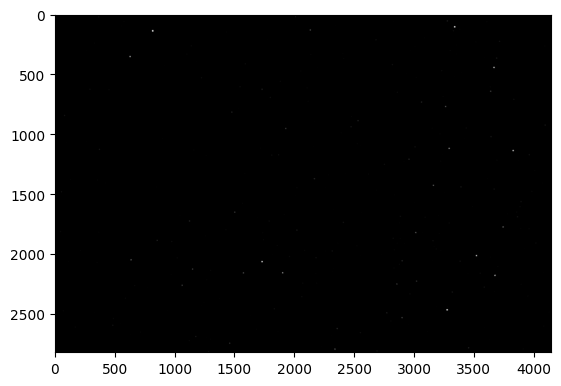

In [8]:
plt.imshow(star_img, cmap='gray')

In [9]:
df_ref

,area,cluster_cx,cluster_cy,iwc_cx,iwc_cy,gaussian_cx,gaussian_cy,box,tile_4,tile_32,fwhm_x,fwhm_y
0,330,632.930303,2051.966667,22.000977,18.000977,19.445930,22.883351,"[611, 2032, 654, 2071]",531626,8340,8.337355,9.019000
1,323,3669.024768,2181.693498,18.000977,18.000977,19.680262,18.854735,"[3649, 2162, 3690, 2201]",565537,8955,10.661034,10.624041
2,313,3514.498403,2016.651757,17.000977,18.000977,19.475557,18.278973,"[3495, 1997, 3534, 2036]",523023,8300,11.263100,10.704717
3,311,3660.774920,445.263666,19.000977,18.000977,18.534161,19.843707,"[3640, 427, 3681, 464]",115911,1934,11.503017,10.919182
4,308,1898.061688,2160.506494,18.000977,19.000977,19.645572,17.729837,"[1880, 2140, 1917, 2181]",559915,8899,9.717917,10.065953
5,305,814.413115,139.524590,17.000977,20.000977,20.760033,17.477041,"[797, 119, 832, 160]",36464,545,13.797493,15.959861
6,304,3332.641447,106.085526,19.000977,18.000977,18.314829,20.185398,"[3312, 88, 3353, 125]",28805,494,13.387562,11.769476
7,304,3820.562500,1139.243421,18.000977,18.000977,19.445197,18.350336,"[3801, 1120, 3840, 1159]",296215,4799,11.044797,11.195841
8,302,625.692053,354.033113,18.000977,20.000977,20.443636,18.572477,"[607, 334, 644, 375]",92360,1450,9.402102,10.900787
9,299,1726.210702,2067.173913,18.000977,18.000977,18.568716,18.106730,"[1708, 2048, 1745, 2087]",536044,8504,11.669707,12.298536


In [10]:
from pathlib import Path
import tempfile
import pickle

def get_stardata(fpath):
  fpath = Path(fpath)
  datafile = Path(tempfile.gettempdir()) / fpath.with_suffix('.stardata').name

  if datafile.exists():
    with datafile.open('rb') as f:
      starData = pickle.load(f)
  else:
    starData = starfinder.getStarData(fpath, topk=20)
    with datafile.open('wb') as f:
      pickle.dump(starData, f)
  return starData

def ave_fwhm(fname):
  starData = get_stardata(fname)
  df = starData["stars"]
  series = pd.Series({"myfwhm_x": df.fwhm_x.mean(), "myfwhm_y":df.fwhm_y.mean(), "myfwhm_ave":((df.fwhm_x + df.fwhm_y)/2).mean()})
  return series


In [11]:
cols = df.fit_file.apply(lambda x: ave_fwhm(x))
cols

,myfwhm_x,myfwhm_y,myfwhm_ave
0,10.429409,10.398997,10.414203
1,11.286856,11.289979,11.288418
2,10.451462,10.377361,10.414412
3,13.281536,12.747972,13.014754
4,12.391010,10.100472,11.245741
...,...,...,...
69,12.280621,12.079622,12.180121
70,12.520822,12.528309,12.524566
71,11.514945,11.574933,11.544939
72,12.929937,13.144883,13.037410


In [12]:
df[['my_fwhm_x', 'my_fwhm_y', 'my_fwhm']] = cols

In [13]:
df

,Index,Approved,Locked,File,Weight,PSF Signal Weight,PSF Power Weight,SNR Weight,FWHM,Eccentricity,...,Noise Ratio,Stars,Star Residual,FWHM Mean Deviation,Eccentricity Mean Deviation,Star Residual Mean Deviation,fit_file,my_fwhm_x,my_fwhm_y,my_fwhm
0,14,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00948_...,0.0,776.0,2810000.0,1.80,3.0627,0.4692,...,0.715,458,0.0193,1.1625,0.1532,0.0104,D:\Astro\20220922\C30\Light\Light_00948_180.0s...,10.429409,10.398997,10.414203
1,27,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00961_...,0.0,726.0,2490000.0,1.78,3.1120,0.4887,...,0.720,428,0.0198,1.0250,0.1450,0.0109,D:\Astro\20220922\C30\Light\Light_00961_180.0s...,11.286856,11.289979,11.288418
2,21,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00955_...,0.0,741.0,2610000.0,1.80,3.1677,0.4720,...,0.718,453,0.0208,1.0185,0.1411,0.0103,D:\Astro\20220922\C30\Light\Light_00955_180.0s...,10.451462,10.377361,10.414412
3,18,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00952_...,0.0,759.0,2700000.0,1.81,3.1840,0.4619,...,0.717,447,0.0211,1.0659,0.1480,0.0103,D:\Astro\20220922\C30\Light\Light_00952_180.0s...,13.281536,12.747972,13.014754
4,19,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_00953_...,0.0,722.0,2460000.0,1.85,3.1876,0.5180,...,0.718,383,0.0226,1.0306,0.1198,0.0103,D:\Astro\20220922\C30\Light\Light_00953_180.0s...,12.391010,10.100472,11.245741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,54,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01310_...,0.0,680.0,2240000.0,1.88,3.9763,0.4168,...,0.726,361,0.0228,1.0214,0.1422,0.0112,D:\Astro\20220927\C30\Light\Light_01310_180.0s...,12.280621,12.079622,12.180121
70,57,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01317_...,0.0,657.0,2070000.0,1.88,3.9848,0.4075,...,0.731,351,0.0258,0.9513,0.1372,0.0122,D:\Astro\20220927\C30\Light\Light_01317_180.0s...,12.520822,12.528309,12.524566
71,52,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01308_...,0.0,689.0,2300000.0,1.89,3.9939,0.4116,...,0.727,366,0.0225,1.0908,0.1505,0.0109,D:\Astro\20220927\C30\Light\Light_01308_180.0s...,11.514945,11.574933,11.544939
72,56,True,False,D:/Astro/Objects/C30-NGC7331/subs/Light_01312_...,0.0,681.0,2230000.0,1.88,4.0048,0.4207,...,0.728,361,0.0249,0.9815,0.1423,0.0112,D:\Astro\20220927\C30\Light\Light_01312_180.0s...,12.929937,13.144883,13.037410


[ 0.02198651 11.25474828]
[0.01150596 3.2193    ]


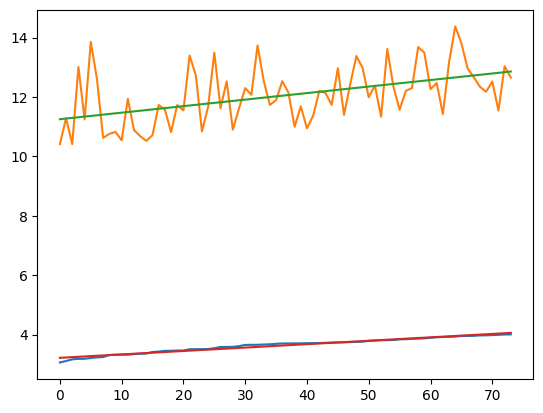

In [14]:
import numpy as np
plt.plot(df.FWHM)
plt.plot(df.my_fwhm)
# plt.plot(df.my_fwhm_y-6.5)
# plt.plot(df.my_fwhm-6.5)

z = np.polyfit(df.index, df.my_fwhm, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index))

z = np.polyfit(df.index, df.FWHM, 1)
print(z)
p = np.poly1d(z)
# add trendline to plot
plt.plot(df.index, p(df.index))

plt.show()

In [15]:
matched_stars = []
for i, tgt_file in enumerate(df.fit_file):
    print(f"Processing {tgt_file}...")

    starData = get_stardata(tgt_file)
    df_tgt = starData['stars']

    df_matched = starmatcher.matchStars(df_ref, df_tgt)
    df_matched.set_index('starno', inplace=True)
    matched_stars.append(df_matched)

Processing D:\Astro\20220922\C30\Light\Light_00948_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 821/821 [00:01<00:00, 638.91it/s]


Processing D:\Astro\20220922\C30\Light\Light_00961_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 839/839 [00:01<00:00, 702.34it/s]


Processing D:\Astro\20220922\C30\Light\Light_00955_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 814/814 [00:01<00:00, 680.53it/s]


Processing D:\Astro\20220922\C30\Light\Light_00952_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 852/852 [00:01<00:00, 691.23it/s]


Processing D:\Astro\20220922\C30\Light\Light_00953_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 835/835 [00:01<00:00, 703.80it/s]


Processing D:\Astro\20220922\C30\Light\Light_00956_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 832/832 [00:01<00:00, 668.72it/s]


Processing D:\Astro\20220922\C30\Light\Light_00962_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 844/844 [00:01<00:00, 689.02it/s]


Processing D:\Astro\20220922\C30\Light\Light_00950_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 822/822 [00:01<00:00, 681.03it/s]


Processing D:\Astro\20220922\C30\Light\Light_00940_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 833/833 [00:01<00:00, 675.29it/s]


Processing D:\Astro\20220922\C30\Light\Light_00935_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 819/819 [00:01<00:00, 683.18it/s]


Processing D:\Astro\20220922\C30\Light\Light_00964_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 796/796 [00:01<00:00, 687.97it/s]


Processing D:\Astro\20220922\C30\Light\Light_00949_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 821/821 [00:01<00:00, 682.43it/s]


Processing D:\Astro\20220922\C30\Light\Light_00934_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 821/821 [00:01<00:00, 692.94it/s]


Processing D:\Astro\20220922\C30\Light\Light_00945_180.0sec_200gain_0.0C.fit...


Matching triangles: 100%|██████████| 801/801 [00:01<00:00, 623.65it/s]


Processing D:\Astro\20220922\C30\Light\Light_00939_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 801/801 [00:01<00:00, 676.93it/s]


Processing D:\Astro\20220922\C30\Light\Light_00967_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 804/804 [00:01<00:00, 676.42it/s]


Processing D:\Astro\20220922\C30\Light\Light_00959_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 804/804 [00:01<00:00, 646.41it/s]


Processing D:\Astro\20220922\C30\Light\Light_00954_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 807/807 [00:01<00:00, 683.25it/s]


Processing D:\Astro\20220922\C30\Light\Light_00941_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 826/826 [00:01<00:00, 679.68it/s]


Processing D:\Astro\20220922\C30\Light\Light_00965_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 795/795 [00:01<00:00, 688.36it/s]


Processing D:\Astro\20220922\C30\Light\Light_00957_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 826/826 [00:01<00:00, 660.66it/s]


Processing D:\Astro\20220922\C30\Light\Light_00946_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 827/827 [00:01<00:00, 631.84it/s]


Processing D:\Astro\20220927\C30\Light\Light_01326_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 878/878 [00:01<00:00, 566.45it/s]


Processing D:\Astro\20220922\C30\Light\Light_00942_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 802/802 [00:01<00:00, 583.53it/s]


Processing D:\Astro\20220927\C30\Light\Light_01325_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 829/829 [00:01<00:00, 600.45it/s]


Processing D:\Astro\20220922\C30\Light\Light_00944_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 838/838 [00:01<00:00, 660.75it/s]


Processing D:\Astro\20220922\C30\Light\Light_00960_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 774/774 [00:01<00:00, 611.13it/s]


Processing D:\Astro\20220922\C30\Light\Light_00970_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 833/833 [00:01<00:00, 637.64it/s]


Processing D:\Astro\20220922\C30\Light\Light_00958_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 793/793 [00:01<00:00, 625.41it/s]


Processing D:\Astro\20220922\C30\Light\Light_00936_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 811/811 [00:01<00:00, 657.29it/s]


Processing D:\Astro\20220922\C30\Light\Light_00943_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 839/839 [00:01<00:00, 648.05it/s]


Processing D:\Astro\20220922\C30\Light\Light_00972_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 829/829 [00:01<00:00, 605.32it/s]


Processing D:\Astro\20220922\C30\Light\Light_00982_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 860/860 [00:01<00:00, 665.51it/s]


Processing D:\Astro\20220922\C30\Light\Light_00992_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 811/811 [00:01<00:00, 652.77it/s]


Processing D:\Astro\20220922\C30\Light\Light_00979_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 838/838 [00:01<00:00, 661.65it/s]


Processing D:\Astro\20220922\C30\Light\Light_00951_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 769/769 [00:01<00:00, 578.15it/s]


Processing D:\Astro\20220927\C30\Light\Light_01327_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 873/873 [00:01<00:00, 551.23it/s]


Processing D:\Astro\20220922\C30\Light\Light_00974_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 839/839 [00:01<00:00, 634.63it/s]


Processing D:\Astro\20220922\C30\Light\Light_00978_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 837/837 [00:01<00:00, 622.23it/s]


Processing D:\Astro\20220922\C30\Light\Light_00981_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 790/790 [00:01<00:00, 636.37it/s]


Processing D:\Astro\20220922\C30\Light\Light_00977_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 797/797 [00:01<00:00, 642.67it/s]


Processing D:\Astro\20220922\C30\Light\Light_00966_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 808/808 [00:01<00:00, 671.18it/s]


Processing D:\Astro\20220927\C30\Light\Light_01324_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 849/849 [00:01<00:00, 689.85it/s]


Processing D:\Astro\20220927\C30\Light\Light_01323_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 872/872 [00:01<00:00, 673.57it/s]


Processing D:\Astro\20220922\C30\Light\Light_00976_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 834/834 [00:01<00:00, 693.29it/s]


Processing D:\Astro\20220922\C30\Light\Light_00985_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 823/823 [00:01<00:00, 653.93it/s]


Processing D:\Astro\20220927\C30\Light\Light_01328_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 831/831 [00:01<00:00, 678.56it/s]


Processing D:\Astro\20220927\C30\Light\Light_01329_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 859/859 [00:01<00:00, 684.65it/s]


Processing D:\Astro\20220922\C30\Light\Light_00975_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 818/818 [00:01<00:00, 670.24it/s]


Processing D:\Astro\20220922\C30\Light\Light_00963_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 829/829 [00:01<00:00, 674.86it/s]


Processing D:\Astro\20220922\C30\Light\Light_00969_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 839/839 [00:01<00:00, 670.81it/s]


Processing D:\Astro\20220922\C30\Light\Light_00983_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 830/830 [00:01<00:00, 662.50it/s]


Processing D:\Astro\20220922\C30\Light\Light_00968_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 844/844 [00:01<00:00, 641.84it/s]


Processing D:\Astro\20220927\C30\Light\Light_01330_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 871/871 [00:01<00:00, 560.36it/s]


Processing D:\Astro\20220927\C30\Light\Light_01322_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 854/854 [00:01<00:00, 644.15it/s]


Processing D:\Astro\20220922\C30\Light\Light_00971_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 843/843 [00:01<00:00, 662.18it/s]


Processing D:\Astro\20220927\C30\Light\Light_01320_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 832/832 [00:01<00:00, 656.98it/s]


Processing D:\Astro\20220927\C30\Light\Light_01321_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 845/845 [00:01<00:00, 689.77it/s]


Processing D:\Astro\20220922\C30\Light\Light_00937_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 810/810 [00:01<00:00, 664.63it/s]


Processing D:\Astro\20220927\C30\Light\Light_01340_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 810/810 [00:01<00:00, 664.76it/s]


Processing D:\Astro\20220927\C30\Light\Light_01319_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 851/851 [00:01<00:00, 680.44it/s]


Processing D:\Astro\20220922\C30\Light\Light_00973_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 817/817 [00:01<00:00, 673.73it/s]


Processing D:\Astro\20220927\C30\Light\Light_01311_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 858/858 [00:01<00:00, 681.72it/s]


Processing D:\Astro\20220927\C30\Light\Light_01336_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 867/867 [00:01<00:00, 684.27it/s]


Processing D:\Astro\20220922\C30\Light\Light_00947_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 814/814 [00:01<00:00, 694.21it/s]


Processing D:\Astro\20220927\C30\Light\Light_01345_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 844/844 [00:01<00:00, 682.78it/s]


Processing D:\Astro\20220927\C30\Light\Light_01303_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 850/850 [00:01<00:00, 687.31it/s]


Processing D:\Astro\20220927\C30\Light\Light_01341_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 861/861 [00:01<00:00, 680.15it/s]


Processing D:\Astro\20220927\C30\Light\Light_01309_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 874/874 [00:01<00:00, 683.22it/s]


Processing D:\Astro\20220927\C30\Light\Light_01310_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 844/844 [00:01<00:00, 708.56it/s]


Processing D:\Astro\20220927\C30\Light\Light_01317_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 866/866 [00:01<00:00, 683.96it/s]


Processing D:\Astro\20220927\C30\Light\Light_01308_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 854/854 [00:01<00:00, 689.22it/s]


Processing D:\Astro\20220927\C30\Light\Light_01312_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 872/872 [00:01<00:00, 676.81it/s]


Processing D:\Astro\20220927\C30\Light\Light_01346_180.0sec_200gain_-0.3C.fit...


Matching triangles: 100%|██████████| 846/846 [00:01<00:00, 653.49it/s]


In [64]:
with open('fwhm_data.pkl', 'wb') as f:
    pickle.dump(matched_stars, f)

In [65]:
with open('fwhm_data.pkl', 'rb') as f:
    matched_stars = pickle.load(f)

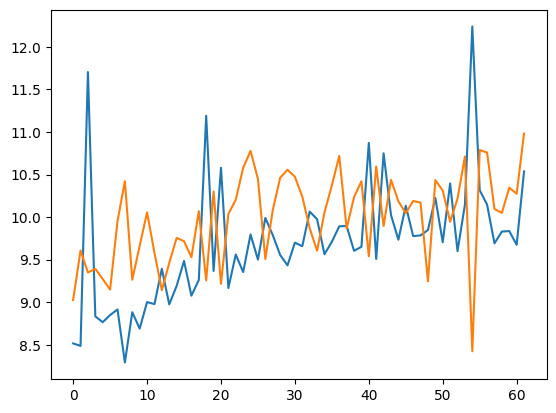

In [68]:
i = 11

fwhm_x = [df_matched.loc[i, "fwhm_x_tgt"] for df_matched in matched_stars if i in df_matched.index]
fwhm_y = [df_matched.loc[i, "fwhm_y_tgt"] for df_matched in matched_stars if i in df_matched.index]

plt.plot(fwhm_x)
plt.plot(fwhm_y)


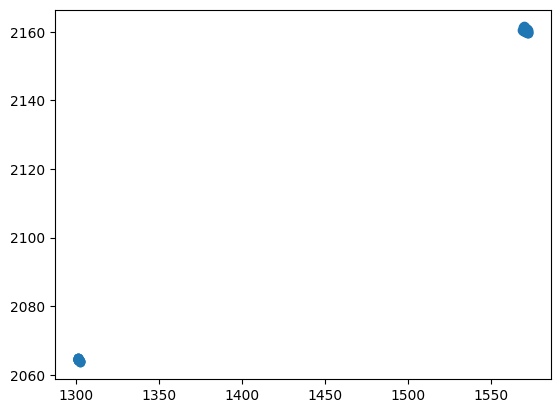

In [69]:

cx = [df_matched.loc[i, "cluster_cx_tgt"] for df_matched in matched_stars if i in df_matched.index]
cy = [df_matched.loc[i, "cluster_cy_tgt"] for df_matched in matched_stars if i in df_matched.index]
plt.scatter(cx, cy)